<h2>Agrupamento c-means supervisinado</h2>
<h3>Vitor Martins Soares</h3>

Agrupamento de amostras servem para classificar e generalizar dados, neste código vamos simular o agrupamento cmeans supervisionado. Será gerado 3 centros e cada centro tera suas amostras, usaremos 2/3 para treinamento e 1/3 das amostras para testes, quando uma amostra está associada a um centro, diferente do não supervisionado, aqui já sabemos a qual classificação ela pertence, então temos que gerar o melhor centro para que tenha o menor erro possível. Uma amostra é associada ao centro mais próximo dela, então tentaremos colocar o centro na melhor posição das amostras ja classificadas.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random

Esta é a função para calcular a distancia de dois pontos, sendo um deles uma amostra e o outro um dos centros gerados. O retorno é utilizado para definir a qual centro o ponto é associado.

In [2]:
def distancia(x1,y1,x2,y2):
  return ((x2-x1)**2+(y2-y1)**2)**0.5

Esta é uma função que soma todos os valores do X ou do Y de um ponto de um determinado centro, para realizar a média e redirecionar o ponto.

In [3]:
def soma(v,t,p):
  valor = 0
  for i in range(len(v)):
    if(p[i]==t):
      valor+=v[i]
  return valor

Aqui são sorteados 30 pontos. Destes 30 pontos, 10 variam o x entre 0 e 5 e o y entre 0 e 5, 10 variam o x entre 4 e 9 e o y em 4 e 9, 10 variam o x entre 9 e 12 e o y entre 0 e 5, como mostra o gráfico abaixo, para fazer com que o agrupamento seja realizado dentre esses 3 grupos. Foi dividido dentre essas 30 amostras, 20 para treinamento e 10 para testes.

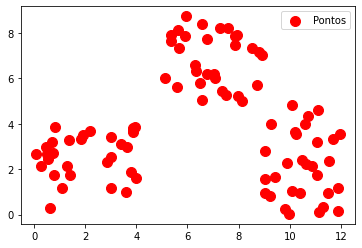

In [4]:
treinoX = list()
treinoY = list()
testeX = list()
testeY = list()
totalX = list()
totalY = list()
gtreino = list()
gteste = list()
for i in range(20):
  num = random.uniform(0,4)
  treinoX.append(num)
  totalX.append(num)
  num = random.uniform(0,4)
  treinoY.append(num)
  totalY.append(num)
  gtreino.append(0)
  num = random.uniform(5,9)
  treinoX.append(num)
  totalX.append(num)
  num = random.uniform(5,9)
  treinoY.append(num)
  totalY.append(num)
  gtreino.append(1)
  num = random.uniform(9,12)
  treinoX.append(num)
  totalX.append(num)
  num = random.uniform(0,4)
  treinoY.append(num)
  totalY.append(num)
  gtreino.append(2)
for i in range(10):  
  num = random.uniform(0,4)
  testeX.append(num)
  totalX.append(num)
  num = random.uniform(0,5)
  testeY.append(num)
  totalY.append(num)
  gteste.append(0)
  num = random.uniform(5,9)
  testeX.append(num)
  totalX.append(num)
  num = random.uniform(5,9)
  testeY.append(num)
  totalY.append(num)
  gteste.append(1)
  num = random.uniform(9,12)
  testeX.append(num)
  totalX.append(num)
  num = random.uniform(0,5)
  testeY.append(num)
  totalY.append(num)
  gteste.append(2)
plt.scatter(totalX, totalY, label = 'Pontos', color = 'r', marker = 'o', s = 100)
plt.legend()
plt.show()

Neste momento vamos definir os 3 centros para esta base, como nosso algoritmo é supervisionado e ja sabemos quais são do mesmo grupo, escolhi os centros iniciais sorteando amostras e utilizando a posição destas amostras como pontos iniciais, isso para cada um dos centros.

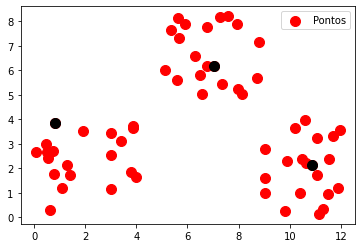

In [5]:
gx = []
gy = []
num = random.randint(0,59)
num = num-(num%3)
gx.append(treinoX[num])
gy.append(treinoY[num])
num = random.randint(0,59)
num = num-(num%3)+1
gx.append(treinoX[num])
gy.append(treinoY[num])
num = random.randint(0,59)
num = num-(num%3)+2
gx.append(treinoX[num])
gy.append(treinoY[num])
plt.scatter(treinoX, treinoY, label = 'Pontos', color = 'r', marker = 'o', s = 100)
plt.scatter(gx,gy,color='black',marker='o',s=100)
plt.legend()
plt.show()

Nesta etapa, iremos treinar as amostras de treinamento apenas, os centros são redirecionados igualmente ao do não supervisionado porém caso haja mudanças mas não tenha mais erros, isto é, os centros são associados ao seus pontos como deveria ser, o programa para, o que gera um centro que não é perfeito igual ao não supervisionado, que o centro é o centro de todas as amostras.

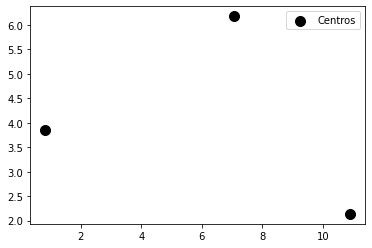

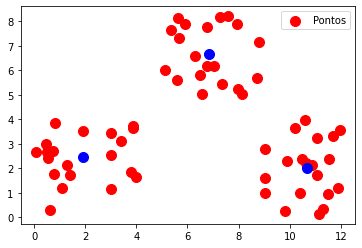

In [6]:
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.show()
cont=0
anterior = [0]
prox = []
pontos = 1
while(cont<10 and pontos!=0):
  anterior = prox
  cont+=1
  prox = []
  menor = 20  
  pontos=0
  for i in range(len(treinoX)):
    prox.append(0)
    for j in range(3):
      aux = distancia(treinoX[i],treinoY[i],gx[j],gy[j])
      if(aux<menor or j==0):
        prox[i] = j
        menor = aux
    if(prox[i]!=gtreino[i]):
      pontos+=1
  c1 = []
  c2 = []
  c3 = []
  for i in range(len(treinoX)):
    if(prox[i]==0):
      c1.append(i)
    elif(prox[i]==1):
      c2.append(i)    
    elif(prox[i]==2):
      c3.append(i)
  cS1 = []
  cS1.append(c1)
  cS1.append(c2)
  cS1.append(c3)
  for i in range(0,3):
    if(len(cS1[i])!=0):
      gx[i] = soma(treinoX,i,prox)/len(cS1[i])
      gy[i] = soma(treinoY,i,prox)/len(cS1[i])
  plt.scatter(treinoX, treinoY, label = 'Pontos', color = 'r', marker = 'o', s = 100)
  plt.scatter(gx,gy,color='b',marker='o',s=100)
  plt.legend()
  plt.show()

Aqui esta os centros com as amostras associadas a ele.

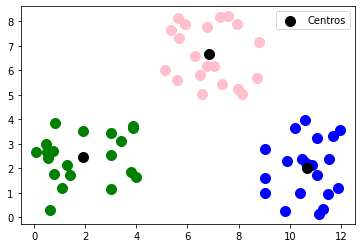

In [7]:
for i in range(len(prox)):
  if(prox[i]==0):
    plt.scatter(treinoX[i],treinoY[i], color = 'green', marker = 'o', s=100)
  elif(prox[i]==1):
    plt.scatter(treinoX[i],treinoY[i], color = 'pink', marker = 'o', s=100)
  elif(prox[i]==2):
    plt.scatter(treinoX[i],treinoY[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.show()

Agora faremos o teste para ver se existe algum erro com outras amostras e comparamos os dois gráficos, com as amostras de treinamento, com as amostras de teste e com as duas juntas.

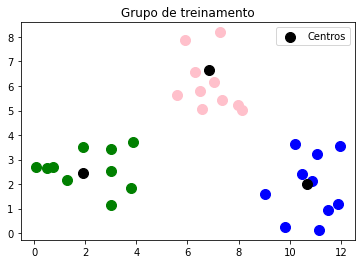

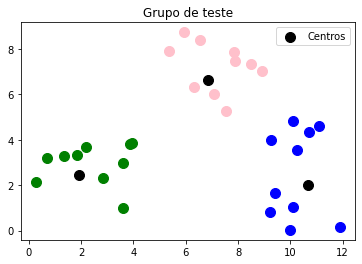

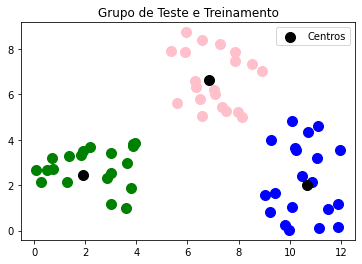

Erros: 0


In [8]:
prox = list()
for i in range(len(testeX)):
  prox.append(0)
  for j in range(3):
    aux = distancia(testeX[i],testeY[i],gx[j],gy[j])
    if(aux<menor or j==0):
      prox[i] = j
      menor = aux
  if(prox[i]!=gteste[i]):
    pontos+=1
  
for i in range(len(prox)):
  if(prox[i]==0):
    plt.scatter(treinoX[i],treinoY[i], color = 'green', marker = 'o', s=100)
  elif(prox[i]==1):
    plt.scatter(treinoX[i],treinoY[i], color = 'pink', marker = 'o', s=100)
  elif(prox[i]==2):
    plt.scatter(treinoX[i],treinoY[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.title("Grupo de treinamento")
plt.show()

for i in range(len(prox)):
  if(gteste[i]==0):
    plt.scatter(testeX[i],testeY[i], color = 'green', marker = 'o', s=100)
  elif(gteste[i]==1):
    plt.scatter(testeX[i],testeY[i], color = 'pink', marker = 'o', s=100)
  elif(gteste[i]==2):
    plt.scatter(testeX[i],testeY[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.title("Grupo de teste")
plt.show()

for i in range(len(prox)):
  if(prox[i]==0):
    plt.scatter(treinoX[i],treinoY[i], color = 'green', marker = 'o', s=100)
  elif(prox[i]==1):
    plt.scatter(treinoX[i],treinoY[i], color = 'pink', marker = 'o', s=100)
  elif(prox[i]==2):
    plt.scatter(treinoX[i],treinoY[i], color = 'blue', marker = 'o', s=100)
for i in range(len(prox)):
  if(gteste[i]==0):
    plt.scatter(testeX[i],testeY[i], color = 'green', marker = 'o', s=100)
  elif(gteste[i]==1):
    plt.scatter(testeX[i],testeY[i], color = 'pink', marker = 'o', s=100)
  elif(gteste[i]==2):
    plt.scatter(testeX[i],testeY[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.title("Grupo de Teste e Treinamento")
plt.show()
print("Erros:",pontos)

É possível ver que não ouve erros, porém caso os dados estejam mais próximos ou que "invadem" o espaço de outro grupo de amostras, pode ocorrer mais erros.